In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

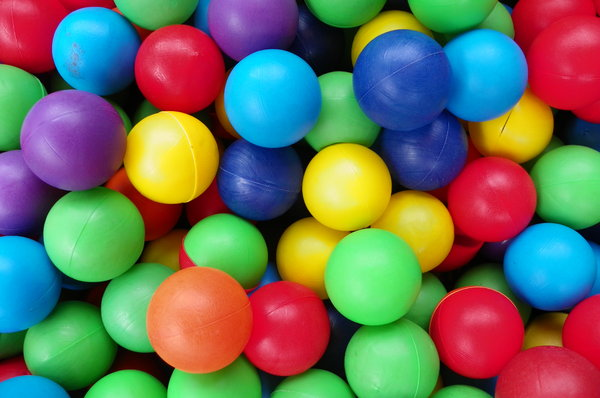

In [42]:
image = cv2.imread("/content/colorball.jpg")
hsv=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
cv2_imshow(image)

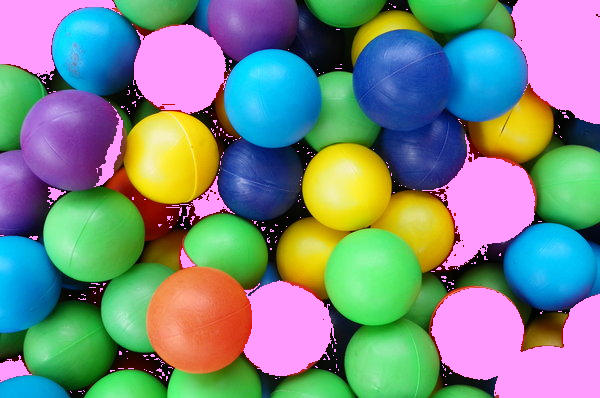

In [43]:
red_lo=np.array([155,25,0])
red_hi=np.array([179,255,255])
mask=cv2.inRange(hsv,red_lo,red_hi)
image[mask>10]=(255, 155, 255)
cv2.imwrite("result.png",image)
cv2_imshow(image)